# Analyzing the spectrograms of one note played by a single instrument

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import stft

In [2]:

filename = "single_instrument_one_note.wav"
sig, sr = sf.read(filename)

# If stereo, take first channel
if sig.ndim > 1:
    sig = sig[:, 0]

# Normalize to ±1
sig = sig / np.max(np.abs(sig))

print(f"Loaded file: {filename}, Sampling Rate: {sr} Hz")


def plot_spectrogram(signal, sr, win_ms, hop_ms, title):
    nperseg = int(sr * win_ms / 1000)   # window length in samples
    noverlap = nperseg - int(sr * hop_ms / 1000)  # hop length
    f, t, Zxx = stft(signal, sr, window="hann", nperseg=nperseg, noverlap=noverlap)

    # Magnitude in dB scale
    mag_db = 20 * np.log10(np.abs(Zxx) + 1e-10)  # avoid log(0)

    plt.figure(figsize=(10, 6))
    im = plt.pcolormesh(t, f, mag_db, shading="gouraud", cmap="magma",
                        vmin=-60, vmax=0)  # fixed dB range
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(im, label="Magnitude [dB]", location="right")
    plt.ylim([0, sr/2])  # show up to Nyquist
    plt.show()


Loaded file: single_instrument_one_note.wav, Sampling Rate: 48000 Hz


## (a) Spectrogram: 30 ms window, 15 ms hop, hanning shape

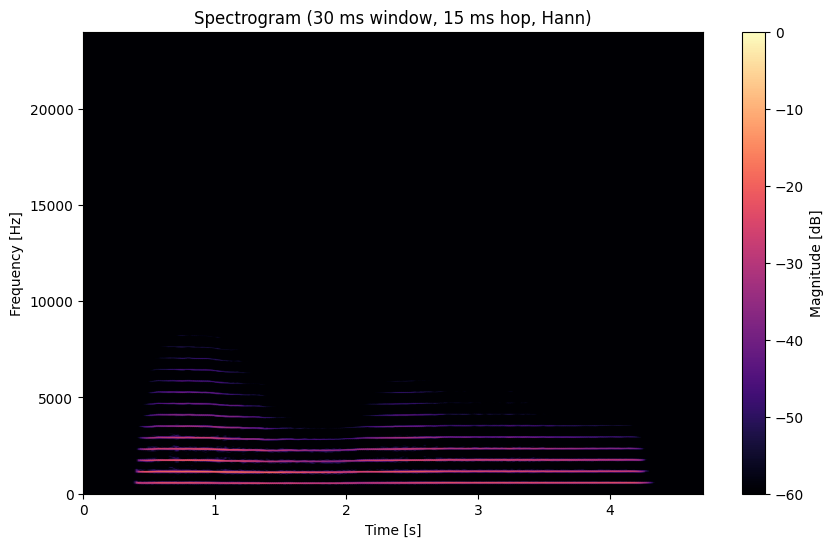

In [3]:
plot_spectrogram(sig, sr, win_ms=30, hop_ms=15,
                 title="Spectrogram (30 ms window, 15 ms hop, Hann)")

## (b) Spectrogram: 5 ms window, 2.5 ms hop, hanning shape

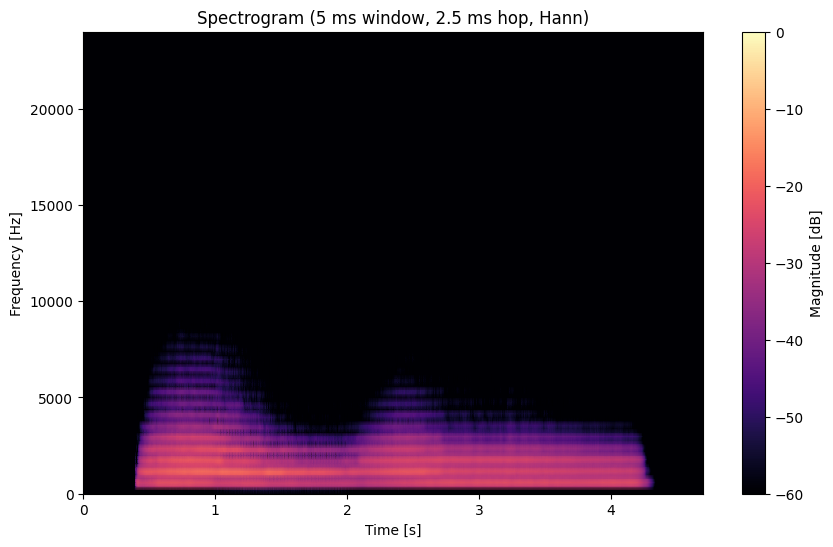

In [4]:

plot_spectrogram(sig, sr, win_ms=5, hop_ms=2.5,
                 title="Spectrogram (5 ms window, 2.5 ms hop, Hann)")

## c) Spectrogram of Triple Convolution of Signal with itself

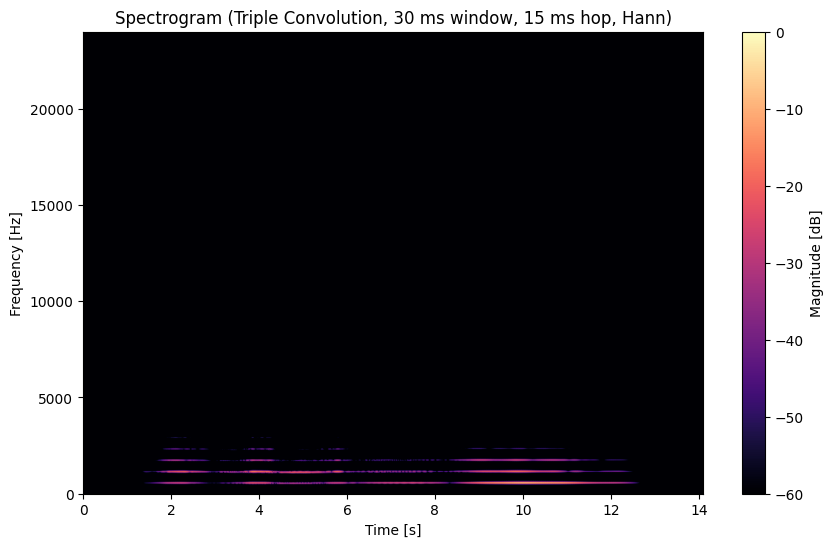

In [5]:

from scipy.signal import fftconvolve

# using FFT-based convolution
conv_sig = fftconvolve(sig, sig, mode="full")
conv_sig = fftconvolve(conv_sig, sig, mode="full")

# Normalize
conv_sig = conv_sig / np.max(np.abs(conv_sig))

plot_spectrogram(conv_sig, sr, win_ms=30, hop_ms=15,
                 title="Spectrogram (Triple Convolution, 30 ms window, 15 ms hop, Hann)")


In [6]:
# listening to conv signal
import soundfile as sf

sf.write("triple_convolution.wav", conv_sig, sr)


### Observations from Triple Convolution Spectrogram

- **Harmonic Content**  
  - The original signal shows clearer harmonic structure across lower and higher frequencies.  
  - After triple convolution, the harmonic structure is much weaker, especially at **higher frequencies**.  
  - Only a few strong components remain at the **lower frequency range**, while most higher harmonics vanish.

- **Energy Distribution**  
  - Energy is concentrated at lower frequencies after convolution.  
  - The signal appears more "smeared" in the time-frequency representation.  

- **Overall Effect**  
  - The convolution process acts somewhat like a **low-pass filter**, suppressing higher harmonics.  
  - This gives the signal a more muffled, less bright sound compared to the original.
  - It reduces clarity, making the sound less tonal and more blurred.  

- **Observations from Listening**  
  - The convolved signal sounds **duller, heavier, and less tonal**, with reduced harmonic richness.  
  - Compared to the original, it lacks the clear tonal quality and instead feels **blurred and muffled**.
